In [1]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv("/content/sample_data/Naive_Bayes_Dataset_COVID.csv")
df.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [15]:
# we need to encode it we use LabelEncoded
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

no_encoded = le.fit_transform(df["no"])
pc_encoded = le.fit_transform(df["pc"])
wbc_encoded = le.fit_transform(df["wbc"])
mc_encoded = le.fit_transform(df["mc"])
ast_encoded = le.fit_transform(df["ast"])
bc_encoded = le.fit_transform(df["bc"])
ldh_encoded = le.fit_transform(df["ldh"])
diagnosis_encoded = le.fit_transform(df["diagnosis"])

x = np.array(list(zip(no_encoded,pc_encoded,wbc_encoded,mc_encoded,ast_encoded, bc_encoded, ldh_encoded)))
y = diagnosis_encoded

In [16]:
#  we need to train test and split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)

In [18]:
# we need to have a classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)

In [19]:
# now we need to show the metrics
from sklearn.metrics import classification_report,roc_curve
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [22]:
# now we need to do classification for other stuffs -> probabality
lr_probs = model.predict_proba(xtest)

# only positive
lr_probs = lr_probs[:,1]

In [23]:
# calculation fpr and tpr
lr_fpr,lr_tpr, _ = roc_curve(ytest,lr_probs)

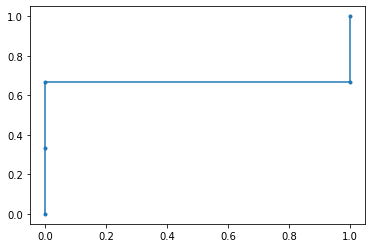

In [24]:
# we need to plot it 
import matplotlib.pyplot as plt
plt.plot(lr_fpr,lr_tpr,marker=".")